# LOGISTIC REGRESSION

Cuando la variable que quiero predecir es una variable cualitativa se aplica regresión Logística.



Cuando el resultado es cualatiativo el scatterplot ( o regplot) no me da mucha informaicón fácil de interpretar, es mejor usar histogramas.

In [1]:
import pandas as pd
df_churn = pd.read_csv('churn.csv')

<AxesSubplot:xlabel='time_since_last_purchase', ylabel='has_churned'>

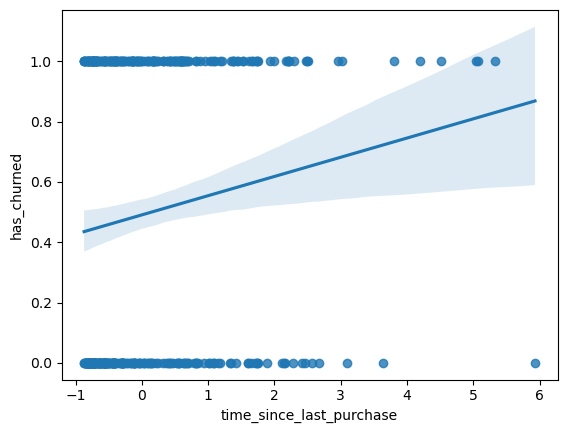

In [2]:
import seaborn as sns
sns.regplot(x='time_since_last_purchase', y='has_churned', data=df_churn)

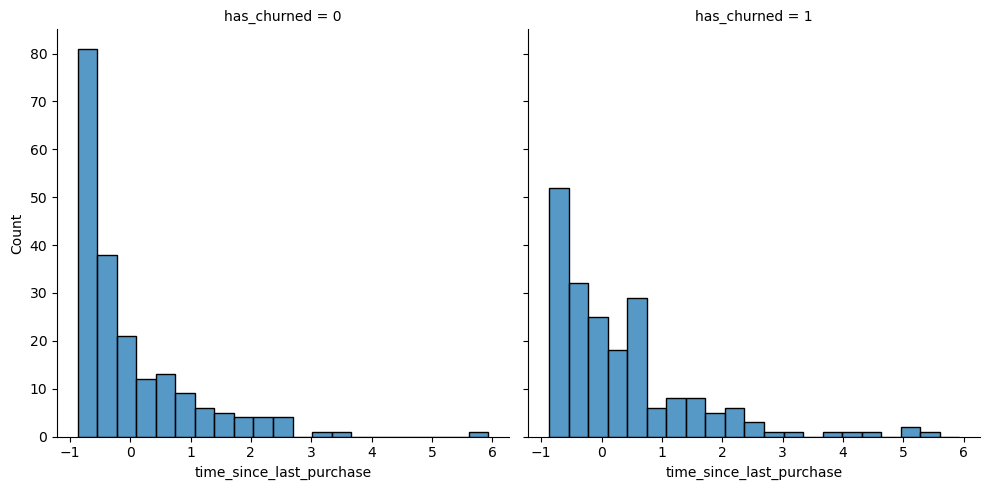

In [3]:
#genero histograma
sns.displot(x='time_since_last_purchase', col='has_churned', data=df_churn)

In [4]:
#importamos la funcion para realizar reg log
from statsmodels.formula.api import logit

# implementamos modelo
mdl_churn_lastPurch = logit('has_churned~time_since_last_purchase', data= df_churn).fit()

# mostramos parametros
print(mdl_churn_lastPurch.params)

Optimization terminated successfully.
         Current function value: 0.683000
         Iterations 4
Intercept                  -0.035019
time_since_last_purchase    0.269215
dtype: float64


In [5]:
# Creamos valores a predecir
import numpy as np
data_predict = pd.DataFrame({'time_since_last_purchase': np.arange(-1,6,0.5)})

#Predecimos usando modelo

data_predict = data_predict.assign(has_churned=mdl_churn_lastPurch.predict(data_predict ))

data_predict.head()




,time_since_last_purchase,has_churned
0,-1.0,0.424523
1,-0.5,0.457695
2,0.0,0.491246
3,0.5,0.524876
4,1.0,0.558283


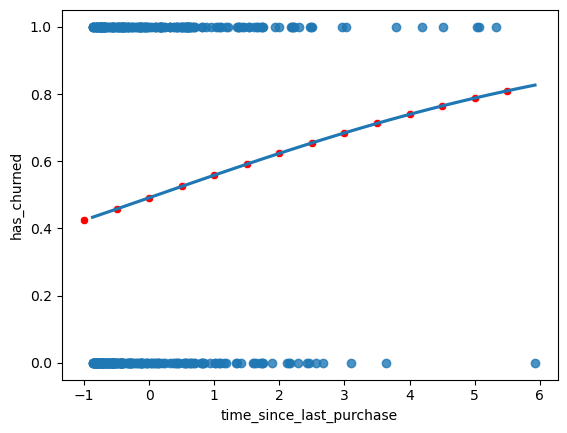

In [6]:
#mostramos resultado
import matplotlib.pyplot as plt

fig = plt.figure()

# El original

sns.regplot(x='time_since_last_purchase', y='has_churned', data=df_churn, logistic=True, ci= None)

# Mis predicciones

sns.scatterplot(x='time_since_last_purchase', y='has_churned', data=data_predict, color='red')

plt.show()

In [7]:
#Creamos nuevo campo
data_predict['posibleBaja'] = np.round(data_predict['has_churned'])

# para gestionar el %

data_predict['posibleBaja'] = data_predict['has_churned'].apply(lambda x: 1 if x>0.5 else 0)


data_predict.head()

,time_since_last_purchase,has_churned,posibleBaja
0,-1.0,0.424523,0
1,-0.5,0.457695,0
2,0.0,0.491246,0
3,0.5,0.524876,1
4,1.0,0.558283,1


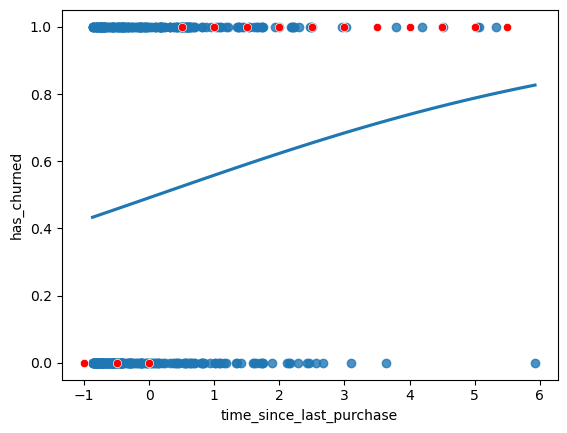

In [8]:
#Vuelvo a mostrar
import matplotlib.pyplot as plt

fig = plt.figure()

# El original

sns.regplot(x='time_since_last_purchase', y='has_churned', data=df_churn, logistic=True, ci= None)

# Mis predicciones

sns.scatterplot(x='time_since_last_purchase', y='posibleBaja', data=data_predict, color='red')

plt.show()

## Matriz de confusión

La matriz de confusión es la base métrica para valorar la calidad de un modelo. En este caso tenemos dos posibles respuestas: SE DA de baja / NO se da de BAJA.

Nuestro modelo nos genera un cuadro de cuatro opciones:


*   VERDADERO POSITIVO: Un valor que deberia dara 1 ( SE DA de baja) nuestro modelo lo predice correctamente, como 1.
*   FALSO POSITIVO: Un valor que deberia ser 0 ( NO se da de Baja), nuestro modelo lo predice como 1 ( SE da de BAjA)
*   VERDAERO NEGATIVO: Un valor que deberia ser 0 (NO se da de Baja), mi modelo lo predice correctamente, como 0.
*   FALSO NEGATIVO: Un valor que deberia ser 1 ( SE da de baja), nuestro modelo lo predice como 0.





In [9]:
# Guardamos el valor real en una columas
respuesta_real = df_churn['has_churned']

In [10]:
# Obtenemos la predicción de todos los valores de nuestro dataSet, no del arange que creamos manual
prediccion_completa = np.round(mdl_churn_lastPurch.predict(df_churn))

In [11]:
# comparacion modelo
modComp = pd.DataFrame({'real':respuesta_real , 'prediccion':prediccion_completa})

#Mostramos salida
print(modComp.value_counts(sort=False))

real  prediccion
0     0.0           141
      1.0            59
1     0.0           111
      1.0            89
dtype: int64


In [12]:
# Calculamos matriz de confusion sin hacer tantos calculos como antes

conf_matrix = mdl_churn_lastPurch.pred_table()

print(conf_matrix)

[[141.  59.]
 [111.  89.]]


In [13]:
# Obtenemos los 4 posibles resultados
VP = conf_matrix[0,0]
VN = conf_matrix[0,1]
FN = conf_matrix[1,0]
FP = conf_matrix[1,1]



In [14]:
#Sacamos las metricas para valorar el modelo
prec= (VP+FP)/(VP+VN+FN+FP)
print(f'La precision de tu modelo es {prec}')

La precision de tu modelo es 0.575


Ej. Calcula la precision del modelo para predecir si un cliente se da de baja a partir de su primera compra


In [18]:
#Calcula la precision del modelo para predecir si un cliente se da de baja a partir de su primera compra

mdl_churn_firstPurch = logit('has_churned~time_since_first_purchase', data= df_churn).fit()
data_predict = pd.DataFrame({'time_since_first_purchase': np.arange(-1,6,0.5)})
data_predict = data_predict.assign(has_churned=mdl_churn_firstPurch.predict(data_predict))
data_predict['posibleBaja'] = np.round(data_predict['has_churned'])
data_predict['posibleBaja'] = data_predict['has_churned'].apply(lambda x: 1 if x>0.5 else 0)
respuesta_real = df_churn['has_churned']
prediccion_completa = np.round(mdl_churn_firstPurch.predict(df_churn))
modComp = pd.DataFrame({'real':respuesta_real , 'prediccion':prediccion_completa})
print(modComp.value_counts(sort=False))
conf_matrix = mdl_churn_firstPurch.pred_table()
print(conf_matrix)
VP = conf_matrix[0,0]
VN = conf_matrix[0,1]
FN = conf_matrix[1,0]
FP = conf_matrix[1,1]
prec= (VP+FP)/(VP+VN+FN+FP)
print(f'La precision de tu modelo es {prec}')

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4
real  prediccion
0     0.0           112
      1.0            88
1     0.0            76
      1.0           124
dtype: int64
[[112.  88.]
 [ 76. 124.]]
La precision de tu modelo es 0.59
